In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import gaussian_kde, stats
from scipy.fft import fft2, fftshift

import random

import matplotlib.pyplot as plt

import os
from pathlib import Path
import glob
import re

In [2]:
# count how many .json files are in data/processed
data_processed_dir = Path("../data/processed")
json_files = list(data_processed_dir.rglob("*.json"))
print(f"Number of .json files in processed data: {len(json_files)}")

Number of .json files in processed data: 58


In [11]:
logs_cubic_z_dir = Path(r"../logs/baselines")

patient_ids = []
for p in logs_cubic_z_dir.iterdir():
    if p.is_file():
        parts = p.stem.split("_")
        if len(parts) >= 2 and parts[-2].isdigit() and parts[-1].isdigit():
            parts = parts[:-2]
        if parts and parts[-1].lower() == "cubic_z":
            parts = parts[:-1]
        if parts and parts[-1].lower() == "bicubic":  # Remove bicubic suffix
            parts = parts[:-1]
        patient_id = "_".join(parts)
        patient_ids.append(patient_id)

print(f"Extracted patient IDs: {patient_ids}")
print(len(patient_ids))

Extracted patient IDs: ['LIDC-IDRI-0066_nodule_0', 'LIDC-IDRI-0066_nodule_1', 'LIDC-IDRI-0066_nodule_2', 'LIDC-IDRI-0314_nodule_0', 'LIDC-IDRI-0325_nodule_0', 'LIDC-IDRI-0424_nodule_2', 'LIDC-IDRI-0445_nodule_1', 'LIDC-IDRI-0454_nodule_4', 'LIDC-IDRI-0454_nodule_6', 'LIDC-IDRI-0481_nodule_6', 'LIDC-IDRI-0490_nodule_0', 'LIDC-IDRI-0507_nodule_0', 'LIDC-IDRI-0507_nodule_1', 'LIDC-IDRI-0507_nodule_2', 'LIDC-IDRI-0521_nodule_0', 'LIDC-IDRI-0525_nodule_2', 'LIDC-IDRI-0557_nodule_1', 'LIDC-IDRI-0576_nodule_2', 'LIDC-IDRI-0606_nodule_0', 'LIDC-IDRI-0625_nodule_0', 'LIDC-IDRI-0651_nodule_0', 'LIDC-IDRI-0651_nodule_2', 'LIDC-IDRI-0655_nodule_4', 'LIDC-IDRI-0674_nodule_3', 'LIDC-IDRI-0733_nodule_5', 'LIDC-IDRI-0736_nodule_0', 'LIDC-IDRI-0742_nodule_9', 'LIDC-IDRI-0761_nodule_2', 'LIDC-IDRI-0770_nodule_11', 'LIDC-IDRI-0770_nodule_4', 'LIDC-IDRI-0775_nodule_0', 'LIDC-IDRI-0775_nodule_1', 'LIDC-IDRI-0775_nodule_2', 'LIDC-IDRI-0775_nodule_3', 'LIDC-IDRI-0776_nodule_0', 'LIDC-IDRI-0776_nodule_2', 'LI

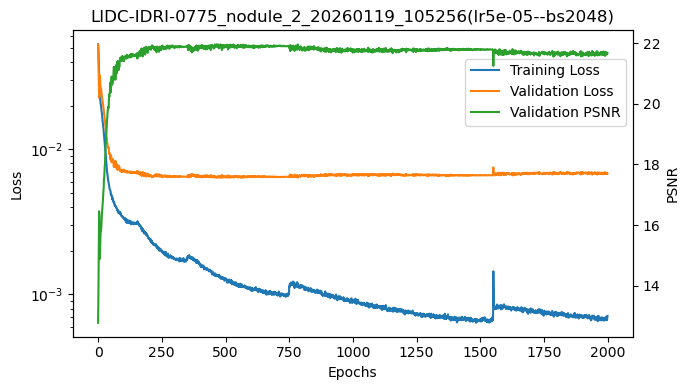

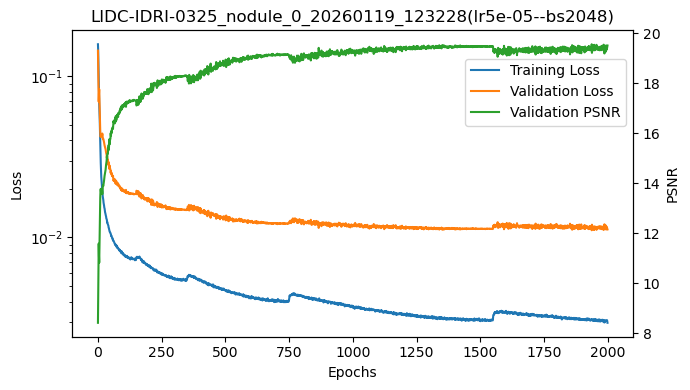

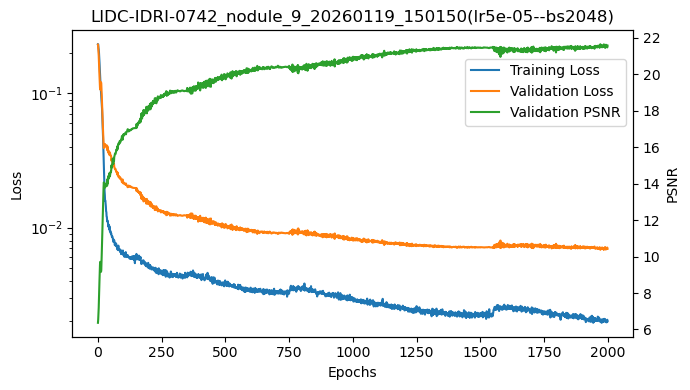

In [5]:
# Plot training histories for random SIREN models

models_dir = Path("../logs/training")
all_paths = [str(p) for p in models_dir.iterdir() if p.is_file()]

paths = random.sample(all_paths, 3)


for path in paths:
    df = pd.read_csv(path, encoding="utf-8")

    # plot losses and PSNR with dual y-axes
    fig, ax1 = plt.subplots(figsize=(7, 4))
    ax1.plot(df["train_loss"], label="Training Loss", color="tab:blue")
    ax1.plot(df["val_loss"], label="Validation Loss", color="tab:orange")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_yscale("log")

    ax2 = ax1.twinx()
    ax2.plot(df["val_psnr"], label="Validation PSNR", color="tab:green")
    ax2.set_ylabel("PSNR")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2,
        labels1 + labels2,
        loc="upper right",
        bbox_to_anchor=(1.0, 0.93)
    )

    plt.title(Path(path).stem)
    plt.tight_layout()
    plt.show()

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\2128407675.py:32: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  'arve_sem': stats.sem(df['arve']),
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\2128407675.py:34: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  'dice_sem': stats.sem(df['dice']),
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\2128407675.py:36: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  'hausdorff_sem': stats.sem(df['hausdorff_distance']),
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\2128407675.py:32: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namesp

SIREN Metrics:
   threshold  arve_mean  arve_sem  dice_mean  dice_sem  hausdorff_mean  \
0       -500   0.582220  0.096389   0.690515  0.022658        3.094082   
1       -450   0.515642  0.086591   0.684076  0.023365        3.112074   
2       -400   0.482515  0.078043   0.671618  0.024708        3.152507   
3       -350   0.470849  0.069611   0.656607  0.025967        3.312525   
4       -300   0.471007  0.062862   0.634694  0.028034        3.387232   

   hausdorff_sem  
0       0.091612  
1       0.092312  
2       0.098075  
3       0.176683  
4       0.188643  

Interpolation Metrics:
   threshold  arve_mean  arve_sem  dice_mean  dice_sem  hausdorff_mean  \
0       -500   0.673623  0.102853   0.696344  0.021534        3.042261   
1       -450   0.581102  0.091137   0.697492  0.021794        3.043267   
2       -400   0.516804  0.080278   0.690658  0.022614        3.046107   
3       -350   0.471037  0.071799   0.680174  0.023788        3.083284   
4       -300   0.444200  0.06352

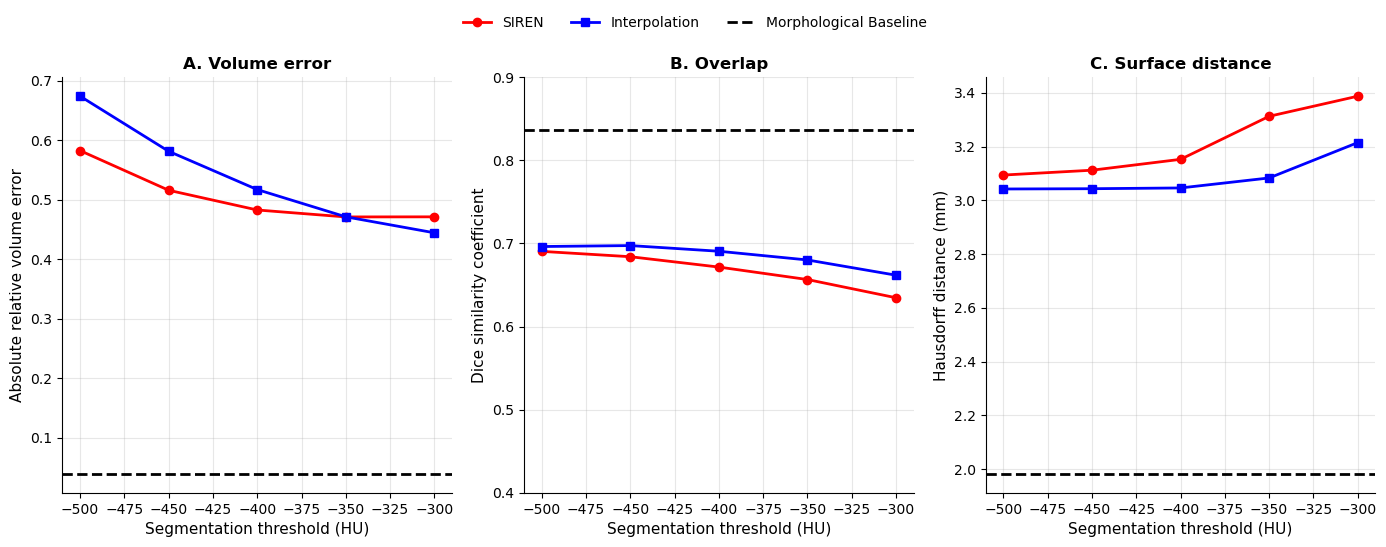


SUMMARY STATISTICS

SIREN - Mean Dice: 0.6675 ± 0.0225
SIREN - Mean ARVE: 0.5044 ± 0.0472
SIREN - Mean Hausdorff Distance: 3.2117 ± 0.1306

Interpolation - Mean Dice: 0.6853 ± 0.0148
Interpolation - Mean ARVE: 0.5374 ± 0.0922
Interpolation - Mean Hausdorff Distance: 3.0859 ± 0.0740


In [6]:
# Evaluate mask reconstruction with HU thresholding across different thresholds - voxel ROI expansion

# Directories
SIREN_DIR = "../logs/vol_SIREN_dilation"
INTERP_DIR = "../logs/vol_interpolation_dilation"

def extract_threshold(filename):
    """Extract the HU threshold number from filename like 'volume_metrics_-300.csv'"""
    match = re.search(r'_(-?\d+)\.csv$', filename)
    if match:
        return int(match.group(1))
    return None

def load_and_average_metrics(directory):
    """Load all CSV files and compute average metrics with SEM"""
    pattern = os.path.join(directory, "volume_metrics_*.csv")
    files = glob.glob(pattern)
    
    results = []
    
    for file_path in files:
        threshold = extract_threshold(os.path.basename(file_path))
        if threshold is None:
            continue
            
        df = pd.read_csv(file_path)
        
        # Calculate mean and SEM for each metric
        avg_metrics = {
            'threshold': threshold,
            'arve_mean': df['arve'].mean(),
            'arve_sem': stats.sem(df['arve']),
            'dice_mean': df['dice'].mean(),
            'dice_sem': stats.sem(df['dice']),
            'hausdorff_mean': df['hausdorff_distance'].mean(),
            'hausdorff_sem': stats.sem(df['hausdorff_distance']),
        }
        results.append(avg_metrics)
    
    results = sorted(results, key=lambda x: x['threshold'])
    return pd.DataFrame(results)

# Load data for both methods
siren_metrics = load_and_average_metrics(SIREN_DIR)
interp_metrics = load_and_average_metrics(INTERP_DIR)

print("SIREN Metrics:")
print(siren_metrics)
print("\nInterpolation Metrics:")
print(interp_metrics)

# Morphological Baseline
MORPHO_ARVE = 0.0393
MORPHO_ARVE_SEM = 0.0480
MORPHO_DICE = 0.8367
MORPHO_DICE_SEM = 0.0610
MORPHO_HAUSDORFF = 1.9830
MORPHO_HAUSDORFF_SEM = 0.5498

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Define colors
SIREN_COLOR = 'red'
INTERP_COLOR = 'blue'
MORPHO_COLOR = 'black'
BAND_ALPHA = 0.12

# ===== Plot 1: ARVE =====
ax = axes[0]
# SIREN
ax.plot(siren_metrics['threshold'], siren_metrics['arve_mean'], 
        marker='o', linewidth=2, label='SIREN', color=SIREN_COLOR)

# Interpolation
ax.plot(interp_metrics['threshold'], interp_metrics['arve_mean'], 
        marker='s', linewidth=2, label='Interpolation', color=INTERP_COLOR)

# Morphological baseline (mean only, no shaded band)
ax.axhline(y=MORPHO_ARVE, color=MORPHO_COLOR, linestyle='--', 
           linewidth=2, label=f"Morphological Baseline")

ax.set_xlabel('Segmentation threshold (HU)', fontsize=11)
ax.set_ylabel('Absolute relative volume error', fontsize=11)
ax.set_title('A. Volume error', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ===== Plot 2: Dice Coefficient =====
ax = axes[1]
ax.plot(siren_metrics['threshold'], siren_metrics['dice_mean'], 
        marker='o', linewidth=2, label='SIREN', color=SIREN_COLOR)

ax.plot(interp_metrics['threshold'], interp_metrics['dice_mean'], 
        marker='s', linewidth=2, label='Interpolation', color=INTERP_COLOR)

ax.axhline(y=MORPHO_DICE, color=MORPHO_COLOR, linestyle='--', 
           linewidth=2, label=f"Morphological Baseline")

ax.set_xlabel('Segmentation threshold (HU)', fontsize=11)
ax.set_ylabel('Dice similarity coefficient', fontsize=11)
ax.set_title('B. Overlap', fontsize=12, fontweight='bold')
ax.set_ylim(0.4, 0.9)
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ===== Plot 3: Hausdorff Distance =====
ax = axes[2]
ax.plot(siren_metrics['threshold'], siren_metrics['hausdorff_mean'], 
        marker='o', linewidth=2, label='SIREN', color=SIREN_COLOR)

ax.plot(interp_metrics['threshold'], interp_metrics['hausdorff_mean'], 
        marker='s', linewidth=2, label='Interpolation', color=INTERP_COLOR)

ax.axhline(y=MORPHO_HAUSDORFF, color=MORPHO_COLOR, linestyle='--', 
           linewidth=2, label=f"Morphological Baseline")

ax.set_xlabel('Segmentation threshold (HU)', fontsize=11)
ax.set_ylabel('Hausdorff distance (mm)', fontsize=11)
ax.set_title('C. Surface distance', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Single, horizontal legend above the subplots
handles_labels = [ax.get_legend_handles_labels() for ax in axes]
handles = sum((hl[0] for hl in handles_labels), [])
labels = sum((hl[1] for hl in handles_labels), [])

# Deduplicate while preserving order
seen = set()
uniq_handles = []
uniq_labels = []
for h, l in zip(handles, labels):
    if l in seen:
        continue
    seen.add(l)
    uniq_handles.append(h)
    uniq_labels.append(l)

fig.legend(uniq_handles, uniq_labels, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 1.02])
plt.savefig('geometric_ROI_expansion_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\nSIREN - Mean Dice: {siren_metrics['dice_mean'].mean():.4f} ± {siren_metrics['dice_mean'].std():.4f}")
print(f"SIREN - Mean ARVE: {siren_metrics['arve_mean'].mean():.4f} ± {siren_metrics['arve_mean'].std():.4f}")
print(f"SIREN - Mean Hausdorff Distance: {siren_metrics['hausdorff_mean'].mean():.4f} ± {siren_metrics['hausdorff_mean'].std():.4f}")

print(f"\nInterpolation - Mean Dice: {interp_metrics['dice_mean'].mean():.4f} ± {interp_metrics['dice_mean'].std():.4f}")
print(f"Interpolation - Mean ARVE: {interp_metrics['arve_mean'].mean():.4f} ± {interp_metrics['arve_mean'].std():.4f}")
print(f"Interpolation - Mean Hausdorff Distance: {interp_metrics['hausdorff_mean'].mean():.4f} ± {interp_metrics['hausdorff_mean'].std():.4f}")


SIREN Metrics:
   threshold  arve_mean  arve_sem  dice_mean  dice_sem  hausdorff_mean  \
0       -500   1.861180  0.288159   0.528612  0.031690       10.670126   
1       -450   1.699154  0.271384   0.526586  0.031983       10.540859   
2       -400   1.563115  0.257685   0.520158  0.032284       10.409420   
3       -350   1.454231  0.244423   0.510367  0.032611       10.354987   
4       -300   1.354151  0.231430   0.495030  0.033286       10.302389   

   hausdorff_sem  
0       0.557856  
1       0.553144  
2       0.575383  
3       0.578626  
4       0.581235  

Interpolation Metrics:
   threshold  arve_mean  arve_sem  dice_mean  dice_sem  hausdorff_mean  \
0       -500   2.072288  0.298641   0.524923  0.031039       10.727406   
1       -450   1.852778  0.279127   0.530290  0.031348       10.624829   
2       -400   1.665986  0.259620   0.529728  0.031586       10.457702   
3       -350   1.514917  0.243233   0.524653  0.031885       10.402201   
4       -300   1.372455  0.22756

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\390723245.py:32: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  'arve_sem': stats.sem(df['arve']),
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\390723245.py:34: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  'dice_sem': stats.sem(df['dice']),
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\390723245.py:36: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  'hausdorff_sem': stats.sem(df['hausdorff_distance']),
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_22252\390723245.py:32: DeprecationWarning: Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace 

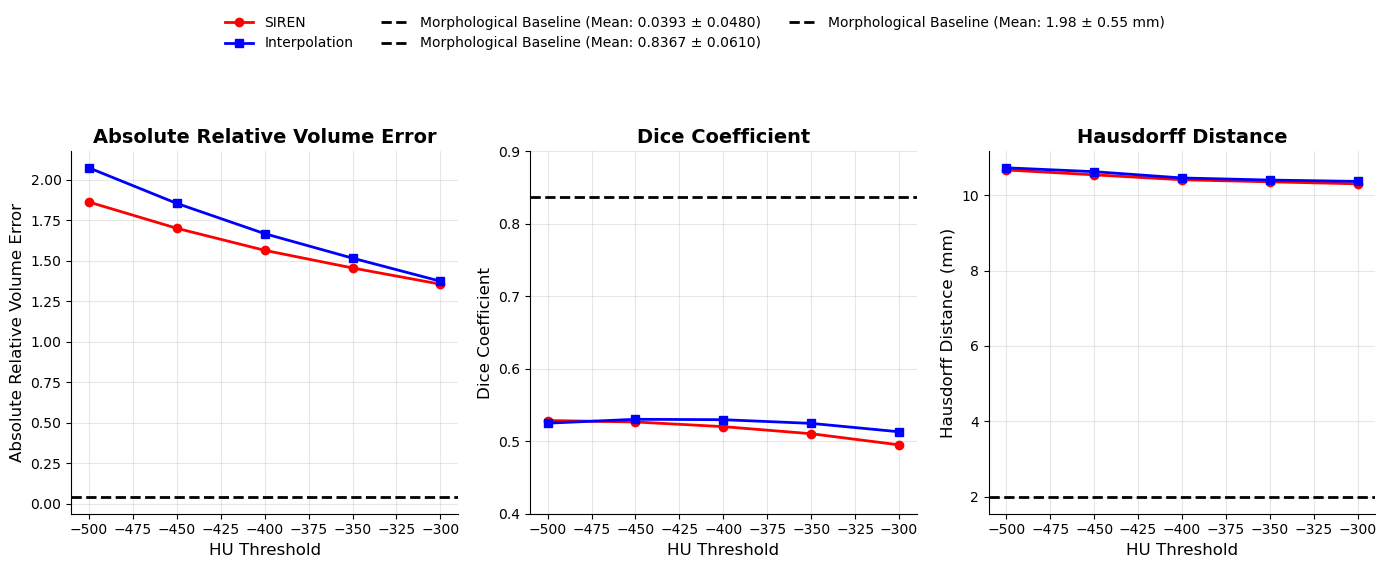


SUMMARY STATISTICS

SIREN - Mean Dice: 0.5162 ± 0.0138
SIREN - Mean ARVE: 1.5864 ± 0.2001
SIREN - Mean Hausdorff Distance: 10.4556 ± 0.1492

Interpolation - Mean Dice: 0.5245 ± 0.0069
Interpolation - Mean ARVE: 1.6957 ± 0.2759
Interpolation - Mean Hausdorff Distance: 10.5157 ± 0.1543


In [7]:
# Evaluate mask reconstruction with HU thresholding across different thresholds - box ROI mask

# Directories
SIREN_DIR = "../logs/vol_SIREN_box"
INTERP_DIR = "../logs/vol_interpolation_box"

def extract_threshold(filename):
    """Extract the HU threshold number from filename like 'volume_metrics_-300.csv'"""
    match = re.search(r'_(-?\d+)\.csv$', filename)
    if match:
        return int(match.group(1))
    return None

def load_and_average_metrics(directory):
    """Load all CSV files and compute average metrics with SEM"""
    pattern = os.path.join(directory, "volume_metrics_*.csv")
    files = glob.glob(pattern)
    
    results = []
    
    for file_path in files:
        threshold = extract_threshold(os.path.basename(file_path))
        if threshold is None:
            continue
            
        df = pd.read_csv(file_path)
        
        # Calculate mean and SEM for each metric
        avg_metrics = {
            'threshold': threshold,
            'arve_mean': df['arve'].mean(),
            'arve_sem': stats.sem(df['arve']),
            'dice_mean': df['dice'].mean(),
            'dice_sem': stats.sem(df['dice']),
            'hausdorff_mean': df['hausdorff_distance'].mean(),
            'hausdorff_sem': stats.sem(df['hausdorff_distance']),
        }
        results.append(avg_metrics)
    
    results = sorted(results, key=lambda x: x['threshold'])
    return pd.DataFrame(results)

# Load data for both methods
siren_metrics = load_and_average_metrics(SIREN_DIR)
interp_metrics = load_and_average_metrics(INTERP_DIR)

print("SIREN Metrics:")
print(siren_metrics)
print("\nInterpolation Metrics:")
print(interp_metrics)

# Morphological Baseline
MORPHO_ARVE = 0.0393
MORPHO_ARVE_SEM = 0.0480
MORPHO_DICE = 0.8367
MORPHO_DICE_SEM = 0.0610
MORPHO_HAUSDORFF = 1.9830
MORPHO_HAUSDORFF_SEM = 0.5498

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Define colors
SIREN_COLOR = 'red'
INTERP_COLOR = 'blue'
MORPHO_COLOR = 'black'
BAND_ALPHA = 0.12

# ===== Plot 1: ARVE =====
ax = axes[0]
# SIREN
ax.plot(siren_metrics['threshold'], siren_metrics['arve_mean'], 
        marker='o', linewidth=2, label='SIREN', color=SIREN_COLOR)

# Interpolation
ax.plot(interp_metrics['threshold'], interp_metrics['arve_mean'], 
        marker='s', linewidth=2, label='Interpolation', color=INTERP_COLOR)

# Morphological baseline (mean only, no shaded band)
ax.axhline(y=MORPHO_ARVE, color=MORPHO_COLOR, linestyle='--', 
           linewidth=2, label=f"Morphological Baseline (Mean: {MORPHO_ARVE:.4f} ± {MORPHO_ARVE_SEM:.4f})")

ax.set_xlabel('HU Threshold', fontsize=12)
ax.set_ylabel('Absolute Relative Volume Error', fontsize=12)
ax.set_title('Absolute Relative Volume Error', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ===== Plot 2: Dice Coefficient =====
ax = axes[1]
ax.plot(siren_metrics['threshold'], siren_metrics['dice_mean'], 
        marker='o', linewidth=2, label='SIREN', color=SIREN_COLOR)

ax.plot(interp_metrics['threshold'], interp_metrics['dice_mean'], 
        marker='s', linewidth=2, label='Interpolation', color=INTERP_COLOR)

ax.axhline(y=MORPHO_DICE, color=MORPHO_COLOR, linestyle='--', 
           linewidth=2, label=f"Morphological Baseline (Mean: {MORPHO_DICE:.4f} ± {MORPHO_DICE_SEM:.4f})")

ax.set_xlabel('HU Threshold', fontsize=12)
ax.set_ylabel('Dice Coefficient', fontsize=12)
ax.set_title('Dice Coefficient', fontsize=14, fontweight='bold')
ax.set_ylim(0.4, 0.9)
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ===== Plot 3: Hausdorff Distance =====
ax = axes[2]
ax.plot(siren_metrics['threshold'], siren_metrics['hausdorff_mean'], 
        marker='o', linewidth=2, label='SIREN', color=SIREN_COLOR)

ax.plot(interp_metrics['threshold'], interp_metrics['hausdorff_mean'], 
        marker='s', linewidth=2, label='Interpolation', color=INTERP_COLOR)

ax.axhline(y=MORPHO_HAUSDORFF, color=MORPHO_COLOR, linestyle='--', 
           linewidth=2, label=f"Morphological Baseline (Mean: {MORPHO_HAUSDORFF:.2f} ± {MORPHO_HAUSDORFF_SEM:.2f} mm)")

ax.set_xlabel('HU Threshold', fontsize=12)
ax.set_ylabel('Hausdorff Distance (mm)', fontsize=12)
ax.set_title('Hausdorff Distance', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Single, horizontal legend above the subplots
handles_labels = [ax.get_legend_handles_labels() for ax in axes]
handles = sum((hl[0] for hl in handles_labels), [])
labels = sum((hl[1] for hl in handles_labels), [])

# Deduplicate while preserving order
seen = set()
uniq_handles = []
uniq_labels = []
for h, l in zip(handles, labels):
    if l in seen:
        continue
    seen.add(l)
    uniq_handles.append(h)
    uniq_labels.append(l)

fig.legend(uniq_handles, uniq_labels, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig('geometric_ROI_box_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\nSIREN - Mean Dice: {siren_metrics['dice_mean'].mean():.4f} ± {siren_metrics['dice_mean'].std():.4f}")
print(f"SIREN - Mean ARVE: {siren_metrics['arve_mean'].mean():.4f} ± {siren_metrics['arve_mean'].std():.4f}")
print(f"SIREN - Mean Hausdorff Distance: {siren_metrics['hausdorff_mean'].mean():.4f} ± {siren_metrics['hausdorff_mean'].std():.4f}")

print(f"\nInterpolation - Mean Dice: {interp_metrics['dice_mean'].mean():.4f} ± {interp_metrics['dice_mean'].std():.4f}")
print(f"Interpolation - Mean ARVE: {interp_metrics['arve_mean'].mean():.4f} ± {interp_metrics['arve_mean'].std():.4f}")
print(f"Interpolation - Mean Hausdorff Distance: {interp_metrics['hausdorff_mean'].mean():.4f} ± {interp_metrics['hausdorff_mean'].std():.4f}")

BATCH EVALUATION FOR STD MULTIPLIERS: [0.8, 1.0, 1.2, 1.5, 1.7, 2.0, 2.2, 2.5, 3.0, 4.0]

Processing std_mult = 0.8...

--- Report for std_mult: 0.8 ---
Rows with infinite HD: SIREN=2, Interp=2
Valid rows: SIREN=48, Interp=48

Mean Metrics:
SIREN  -> Dice: 0.5034, HD: 4.3506, ARVE: 0.6348
Interp -> Dice: 0.4136, HD: 4.4727, ARVE: 0.7224

Comparison (SIREN vs Interpolation):
Dice diff: +0.0899 (+21.73%) -> SIREN better
HD diff:   +0.1222 mm (+2.73%) -> SIREN better
ARVE diff: +0.0875 (+12.12%) -> SIREN better
--------------------------------------------------

Processing std_mult = 1.0...

--- Report for std_mult: 1.0 ---
Rows with infinite HD: SIREN=2, Interp=2
Valid rows: SIREN=48, Interp=48

Mean Metrics:
SIREN  -> Dice: 0.5517, HD: 4.1750, ARVE: 0.5893
Interp -> Dice: 0.4840, HD: 4.3002, ARVE: 0.6579

Comparison (SIREN vs Interpolation):
Dice diff: +0.0677 (+14.00%) -> SIREN better
HD diff:   +0.1252 mm (+2.91%) -> SIREN better
ARVE diff: +0.0685 (+10.42%) -> SIREN better
----------

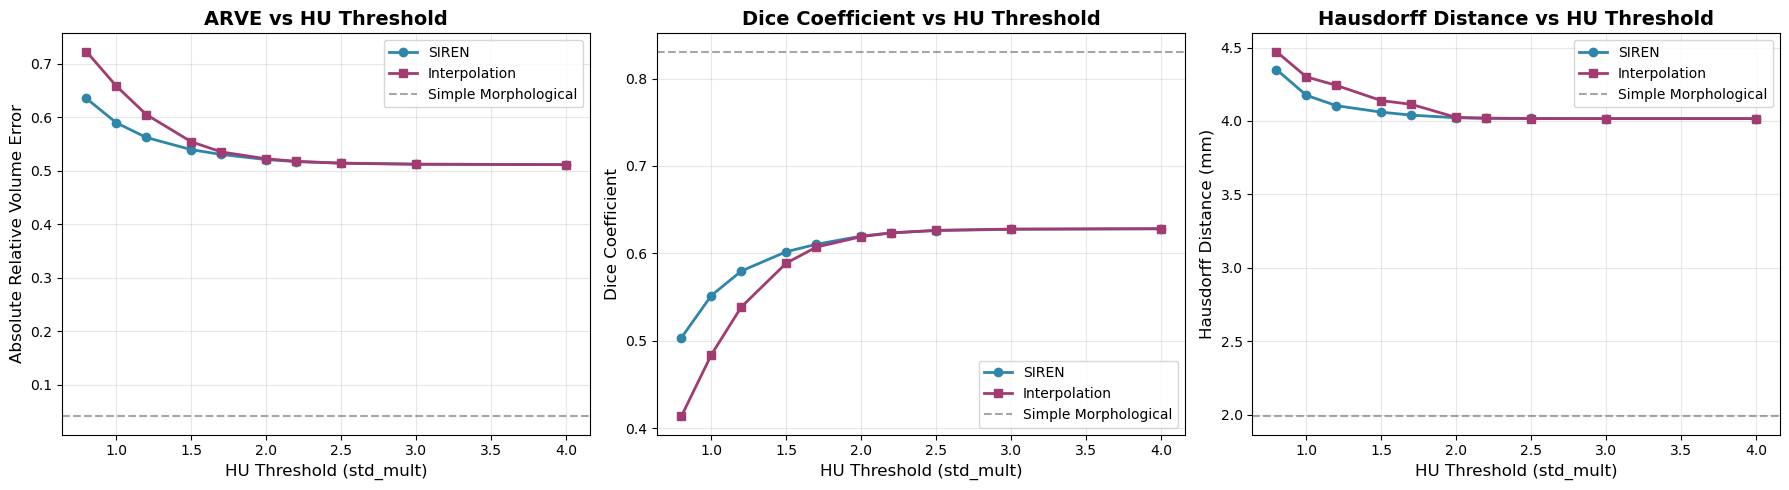

In [8]:
# Mask propagation evaluation across different std multipliers

# Configuration
std_mult_values = [0.8, 1.0, 1.2, 1.5, 1.7, 2.0, 2.2, 2.5, 3.0, 4.0]
base_path = Path('../logs/propagated_evaluation')

# Store metrics for plotting later
metrics_history = {
    'thresholds': std_mult_values,
    'Siren': {'dice': [], 'hd': [], 'arve': []},
    'Interp': {'dice': [], 'hd': [], 'arve': []}
}

print(f"{'='*80}")
print(f"BATCH EVALUATION FOR STD MULTIPLIERS: {std_mult_values}")
print(f"{'='*80}\n")

for val in std_mult_values:
    print(f"Processing std_mult = {val}...")
    
    # Construct file paths
    siren_path = base_path / f'siren_propagated_{val}.csv'
    interp_path = base_path / f'interp_propagated_{val}.csv'
    
    if not siren_path.exists() or not interp_path.exists():
        print(f"Warning: Files not found for {val}. Skipping.\n")
        # Append NaNs to keep lists aligned for plotting
        metrics_history['Siren']['dice'].append(np.nan)
        metrics_history['Siren']['hd'].append(np.nan)
        metrics_history['Siren']['arve'].append(np.nan)
        metrics_history['Interp']['dice'].append(np.nan)
        metrics_history['Interp']['hd'].append(np.nan)
        metrics_history['Interp']['arve'].append(np.nan)
        continue

    # Load the CSV files
    siren_df = pd.read_csv(siren_path)
    interp_df = pd.read_csv(interp_path)

    # Check for infinite values in hausdorff_distance column
    siren_inf_mask = np.isinf(siren_df['hausdorff_distance'])
    interp_inf_mask = np.isinf(interp_df['hausdorff_distance'])

    # Filter out rows with infinite values
    siren_clean = siren_df[~siren_inf_mask].copy()
    interp_clean = interp_df[~interp_inf_mask].copy()
    
    # Calculate means
    s_dice = siren_clean['dice'].mean()
    s_hd = siren_clean['hausdorff_distance'].mean()
    s_arve = siren_clean['arve'].mean()
    
    i_dice = interp_clean['dice'].mean()
    i_hd = interp_clean['hausdorff_distance'].mean()
    i_arve = interp_clean['arve'].mean()

    # Store for plotting
    metrics_history['Siren']['dice'].append(s_dice)
    metrics_history['Siren']['hd'].append(s_hd)
    metrics_history['Siren']['arve'].append(s_arve)
    
    metrics_history['Interp']['dice'].append(i_dice)
    metrics_history['Interp']['hd'].append(i_hd)
    metrics_history['Interp']['arve'].append(i_arve)

    # --- Print Report for this threshold ---
    print(f"\n--- Report for std_mult: {val} ---")
    print(f"Rows with infinite HD: SIREN={siren_inf_mask.sum()}, Interp={interp_inf_mask.sum()}")
    print(f"Valid rows: SIREN={len(siren_clean)}, Interp={len(interp_clean)}")
    
    print("\nMean Metrics:")
    print(f"SIREN  -> Dice: {s_dice:.4f}, HD: {s_hd:.4f}, ARVE: {s_arve:.4f}")
    print(f"Interp -> Dice: {i_dice:.4f}, HD: {i_hd:.4f}, ARVE: {i_arve:.4f}")
    
    # Comparisons
    dice_diff = s_dice - i_dice
    dice_pct = (dice_diff / i_dice) * 100
    
    hd_diff = i_hd - s_hd  # Lower is better
    hd_pct = (hd_diff / i_hd) * 100
    
    arve_diff = i_arve - s_arve  # Lower is better
    arve_pct = (arve_diff / i_arve) * 100

    print("\nComparison (SIREN vs Interpolation):")
    print(f"Dice diff: {dice_diff:+.4f} ({dice_pct:+.2f}%) -> {'SIREN better' if dice_diff > 0 else 'Interp better'}")
    print(f"HD diff:   {hd_diff:+.4f} mm ({hd_pct:+.2f}%) -> {'SIREN better' if hd_diff > 0 else 'Interp better'}")
    print(f"ARVE diff: {arve_diff:+.4f} ({arve_pct:+.2f}%) -> {'SIREN better' if arve_diff > 0 else 'Interp better'}")
    print("-" * 50 + "\n")

    # Plot the metrics history
import matplotlib.pyplot as plt

# Extract data for easier plotting
thresholds = metrics_history['thresholds']
s_dice = metrics_history['Siren']['dice']
s_hd = metrics_history['Siren']['hd']
s_arve = metrics_history['Siren']['arve']

i_dice = metrics_history['Interp']['dice']
i_hd = metrics_history['Interp']['hd']
i_arve = metrics_history['Interp']['arve']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Common style settings
line_width = 2
marker_size = 6
col_siren = '#2E86AB'
col_interp = '#A23B72'

# Plot 1: ARVE (lower is better)
axes[0].plot(thresholds, s_arve, marker='o', linewidth=line_width, label='SIREN', color=col_siren)
axes[0].plot(thresholds, i_arve, marker='s', linewidth=line_width, label='Interpolation', color=col_interp)
axes[0].axhline(y=0.0412, color='gray', linestyle='--', linewidth=1.5, label='Simple Morphological', alpha=0.7)  # ADD THIS
axes[0].set_xlabel('HU Threshold (std_mult)', fontsize=12)
axes[0].set_ylabel('Absolute Relative Volume Error', fontsize=12)
axes[0].set_title('ARVE vs HU Threshold', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Dice Coefficient (higher is better)
axes[1].plot(thresholds, s_dice, marker='o', linewidth=line_width, label='SIREN', color=col_siren)
axes[1].plot(thresholds, i_dice, marker='s', linewidth=line_width, label='Interpolation', color=col_interp)
axes[1].axhline(y=0.8309, color='gray', linestyle='--', linewidth=1.5, label='Simple Morphological', alpha=0.7)  # ADD THIS
axes[1].set_xlabel('HU Threshold (std_mult)', fontsize=12)
axes[1].set_ylabel('Dice Coefficient', fontsize=12)
axes[1].set_title('Dice Coefficient vs HU Threshold', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot 3: Hausdorff Distance (lower is better)
axes[2].plot(thresholds, s_hd, marker='o', linewidth=line_width, label='SIREN', color=col_siren)
axes[2].plot(thresholds, i_hd, marker='s', linewidth=line_width, label='Interpolation', color=col_interp)
axes[2].axhline(y=1.9884, color='gray', linestyle='--', linewidth=1.5, label='Simple Morphological', alpha=0.7)  # ADD THIS
axes[2].set_xlabel('HU Threshold (std_mult)', fontsize=12)
axes[2].set_ylabel('Hausdorff Distance (mm)', fontsize=12)
axes[2].set_title('Hausdorff Distance vs HU Threshold', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()